In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris

In [ ]:
iris = load_iris()

In [ ]:
data = pd.DataFrame(iris.data,columns=iris.feature_names)
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
data['target'] = iris.target
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
X = data.drop('target',axis=1)
y = data['target']

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
clf = DecisionTreeClassifier()
clf.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
clf.score(X_train,y_train)

1.0

In [ ]:
data.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target'],
      dtype='object')

In [ ]:
from sklearn.tree import export_text

In [ ]:
print (export_text(clf,feature_names=['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)']))

|--- petal width (cm) <= 0.80
|   |--- class: 0
|--- petal width (cm) >  0.80
|   |--- petal length (cm) <= 4.75
|   |   |--- petal width (cm) <= 1.65
|   |   |   |--- class: 1
|   |   |--- petal width (cm) >  1.65
|   |   |   |--- class: 2
|   |--- petal length (cm) >  4.75
|   |   |--- petal width (cm) <= 1.75
|   |   |   |--- petal length (cm) <= 4.95
|   |   |   |   |--- class: 1
|   |   |   |--- petal length (cm) >  4.95
|   |   |   |   |--- petal width (cm) <= 1.55
|   |   |   |   |   |--- class: 2
|   |   |   |   |--- petal width (cm) >  1.55
|   |   |   |   |   |--- petal length (cm) <= 5.45
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- petal length (cm) >  5.45
|   |   |   |   |   |   |--- class: 2
|   |   |--- petal width (cm) >  1.75
|   |   |   |--- petal length (cm) <= 4.85
|   |   |   |   |--- sepal length (cm) <= 5.95
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- sepal length (cm) >  5.95
|   |   |   |   |   |--- class: 2
|   |   |   |--- petal 

In [ ]:
from scipy.stats import entropy

In [ ]:
def calculate_entropy(feature,target):
  df = pd.DataFrame({'feature':feature,'target':target})
  feature_values= df.groupby('feature')['target'].apply (lambda x: np.array(x))
  entropy_sum = 0
  for value in feature_values:
    _,counts = np.unique(value,return_counts = True)
    probabilities = counts/counts.sum()
    entropy_sum += entropy(probabilities,base=2)

  return entropy_sum

In [ ]:
for feature in iris.feature_names:
  entropy_value = calculate_entropy(data[feature],data['target'])
  print(f"Entropy for {feature}: {entropy_value}")


Entropy for sepal length (cm): 17.141109670904427
Entropy for sepal width (cm): 15.710621537168969
Entropy for petal length (cm): 3.8693576053129948
Entropy for petal width (cm): 3.4186818396107173


In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier()

In [ ]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
rf.score(X_train,y_train)

1.0

In [ ]:
import matplotlib.pyplot as plt
from sklearn import tree

[Text(0.3333333333333333, 0.875, 'petal width (cm) <= 0.7\ngini = 0.665\nsamples = 76\nvalue = [39, 37, 44]\nclass = virginica'),
 Text(0.16666666666666666, 0.625, 'gini = 0.0\nsamples = 27\nvalue = [39, 0, 0]\nclass = setosa'),
 Text(0.25, 0.75, 'True  '),
 Text(0.5, 0.625, 'petal length (cm) <= 4.75\ngini = 0.496\nsamples = 49\nvalue = [0, 37, 44]\nclass = virginica'),
 Text(0.41666666666666663, 0.75, '  False'),
 Text(0.3333333333333333, 0.375, 'gini = 0.0\nsamples = 22\nvalue = [0, 34, 0]\nclass = versicolor'),
 Text(0.6666666666666666, 0.375, 'petal length (cm) <= 5.15\ngini = 0.12\nsamples = 27\nvalue = [0.0, 3.0, 44.0]\nclass = virginica'),
 Text(0.5, 0.125, '\n  (...)  \n'),
 Text(0.8333333333333334, 0.125, '\n  (...)  \n')]

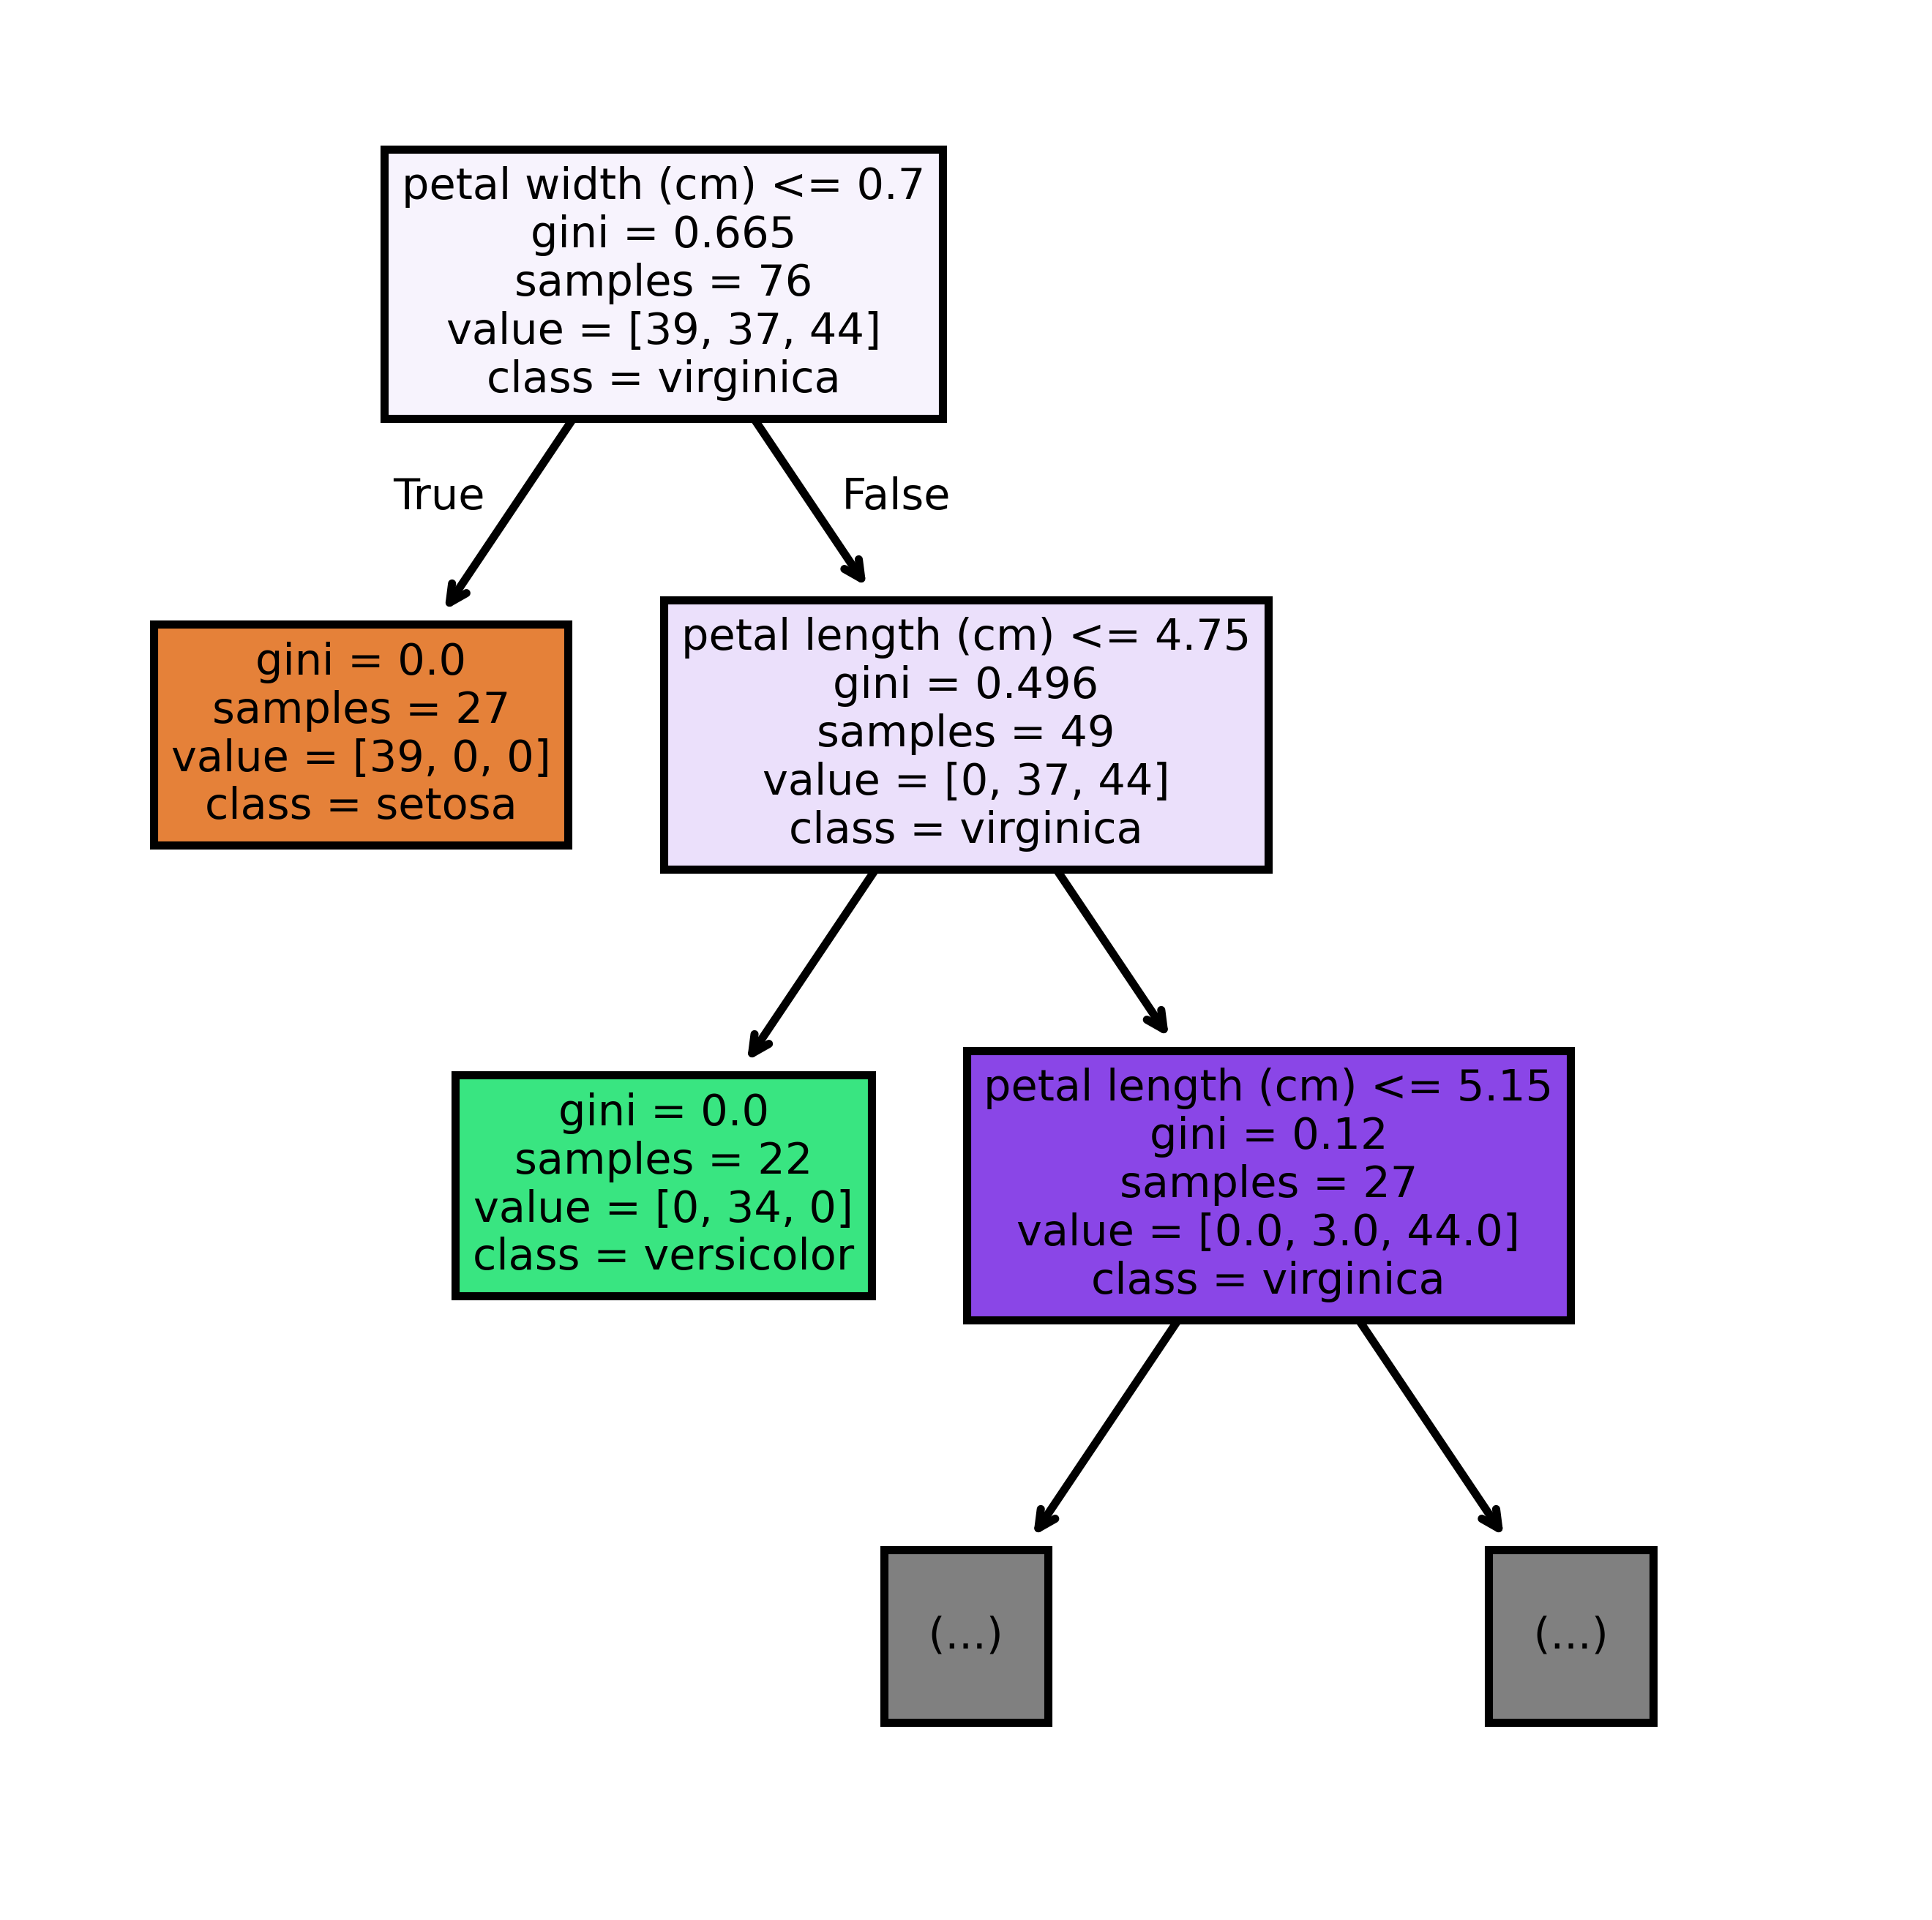

In [ ]:
fn = iris.feature_names
cn = iris.target_names
fig,axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(rf.estimators_[0],
               filled = True,
               feature_names=fn,
               class_names=cn,
                 max_depth=2
                 )

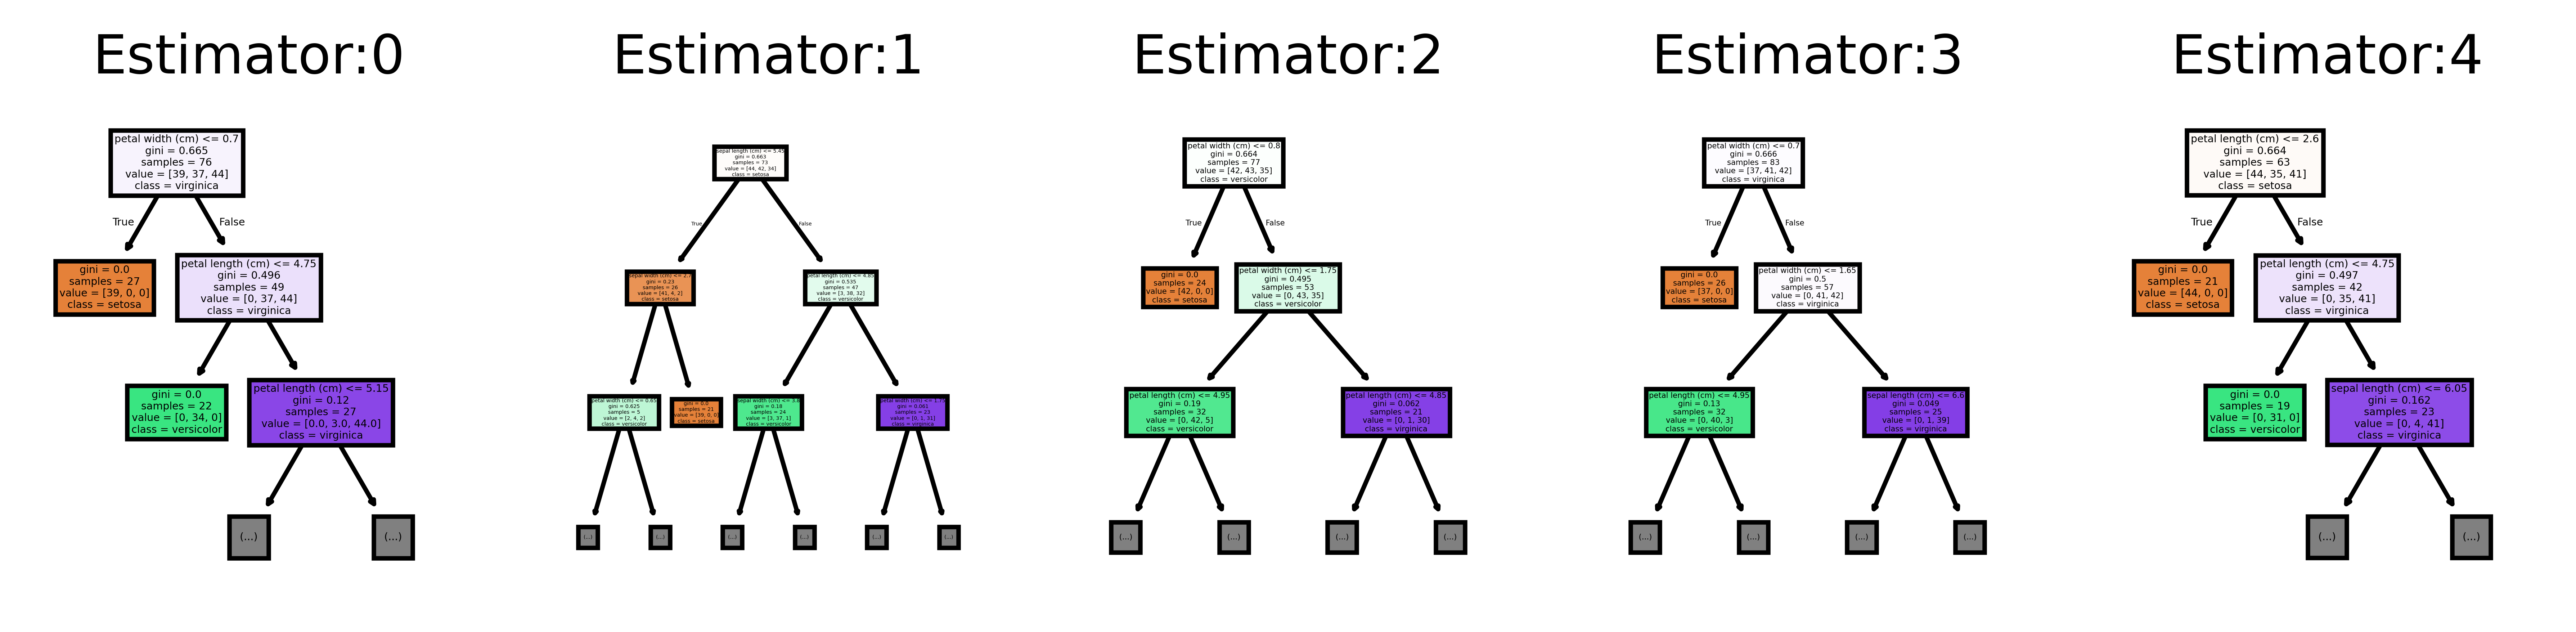

In [ ]:
fn = iris.feature_names
cn = iris.target_names
fig,axes = plt.subplots(nrows = 1,ncols = 5,figsize = (10,2), dpi=900)
for i in range(0,5):
  tree.plot_tree(rf.estimators_[i],
               feature_names=fn,
               class_names=cn,
               filled = True,
               ax = axes[i],
               max_depth=2
          )
  axes[i].set_title(f'Estimator:{i}')
